In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from numpy.random import seed
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
%matplotlib inline

pd.set_option('display.max_colwidth', None)
# PRE-SET PATH TO images FOLDER TO SAVE PLOTS LATER
directory_to_img = os.path.join('..', '..', 'images')

In [2]:
df=pd.read_csv('BTC-USD  with indicator.csv')
df=df.dropna(axis=0)
df=df.drop(['Change','TR','logreturn','NATR','EMA(x,5)','J','DIF','DEA','EMA(x,12)','EMA(x,26)','BIAS5','BIAS10','Close','Change %'],axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace=True)
df=df['2015/1/1':]
df.head()

,Open,High,Low,AdjClose,Volume,ATR,MA5,MA10,MACD,RSI,RSV,K,D
Date,,,,,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550.0,51.517715,315.017603,319.498901,3.402418,53.948,0.19,0.25,0.29
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0,48.139001,314.576202,317.544904,2.943657,50.855,0.26,0.25,0.28
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0,46.935071,308.258600,313.399704,-1.869002,37.469,-,0.17,0.24
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0,47.426356,298.950201,307.918405,-7.041958,35.264,0.09,0.14,0.21
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0,48.843499,289.806403,302.573404,-8.585018,34.191,0.27,0.18,0.20


In [3]:
df.describe()

,Open,High,Low,AdjClose,Volume,ATR,MA5,MA10,MACD,RSI,K,D
count,2527.000000,2527.000000,2527.000000,2527.000000,2.527000e+03,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000
mean,10720.941982,11018.423907,10401.067971,10741.666366,1.467962e+10,2509.818262,10696.581948,10641.339118,-4.453027,51.027911,0.568215,0.568065
std,15414.548938,15849.916345,14931.289934,15436.994857,2.012822e+10,3937.551714,15369.649462,15290.200677,617.692079,13.234650,0.238115,0.211719
min,176.897003,211.731003,171.509995,178.102997,6.467000e+04,13.673355,201.128598,211.798299,-4155.167380,15.990000,0.060000,0.090000
25%,657.390991,666.301483,648.485504,657.182495,9.254155e+07,101.730897,655.612701,658.320404,-55.425118,41.249000,0.360000,0.390000
50%,6357.009766,6480.589844,6265.089844,6361.259766,5.138500e+09,1023.561366,6401.299902,6414.414063,1.389760,51.236000,0.590000,0.580000
75%,10228.922360,10436.166990,9954.698731,10233.750000,2.407170e+10,2309.952340,10257.889255,10275.582815,69.792329,60.509500,0.780000,0.750000
max,67549.734380,68789.625000,66382.062500,67566.828130,3.510000e+11,23555.798830,65727.957810,64698.849610,3264.779873,96.996000,0.960000,0.940000


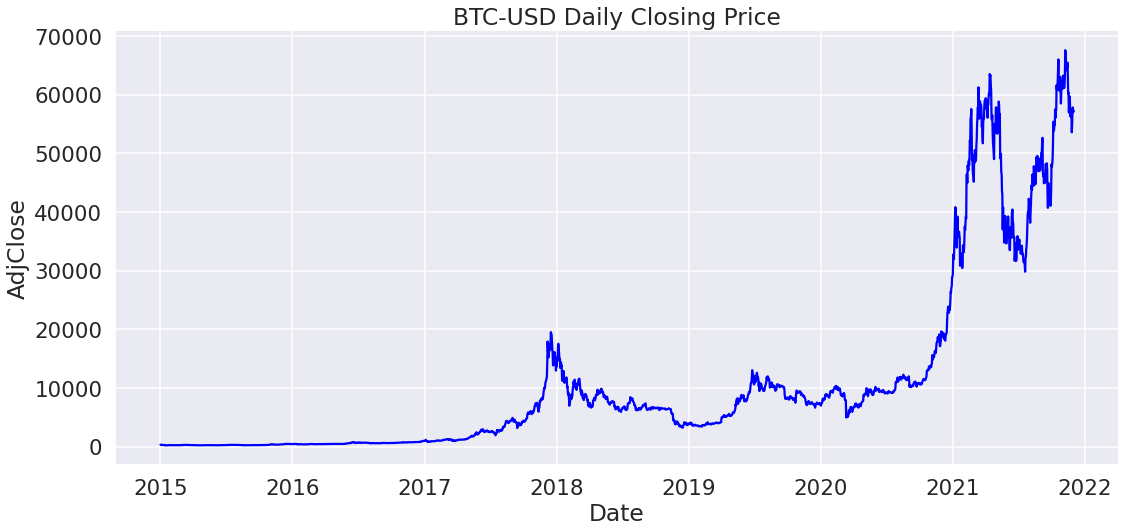

In [4]:
# 增加字体大小
sns.set_context("talk", font_scale=1.3)

#展示BTCUSD从2015年来的收盘价
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x=df.index, y=df.AdjClose, color='blue')
    ax.set_title('BTC-USD Daily Closing Price')    

In [5]:
# 计算每日收益和logreturn
df['returns'] = 100 * df.AdjClose.pct_change().dropna()
df['log_returns'] = np.log(df.AdjClose/df.AdjClose.shift(1))
df.head()

,Open,High,Low,AdjClose,Volume,ATR,MA5,MA10,MACD,RSI,RSV,K,D,returns,log_returns
Date,,,,,,,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550.0,51.517715,315.017603,319.498901,3.402418,53.948,0.19,0.25,0.29,NaN,NaN
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0,48.139001,314.576202,317.544904,2.943657,50.855,0.26,0.25,0.28,0.249172,0.002489
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0,46.935071,308.258600,313.399704,-1.869002,37.469,-,0.17,0.24,-10.776686,-0.114028
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0,47.426356,298.950201,307.918405,-7.041958,35.264,0.09,0.14,0.21,-6.007853,-0.061959
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0,48.843499,289.806403,302.573404,-8.585018,34.191,0.27,0.18,0.20,3.890684,0.038169


In [6]:
#选择log return的时间窗口
intervals = [1,2,7,10, 30, 60]
logs_df = {}

for i in intervals:
    logs = np.log(df.AdjClose/df.AdjClose.shift(i))
    logs_df[i] = logs

logs_df = pd.DataFrame(logs_df, columns=intervals, index=df.index)

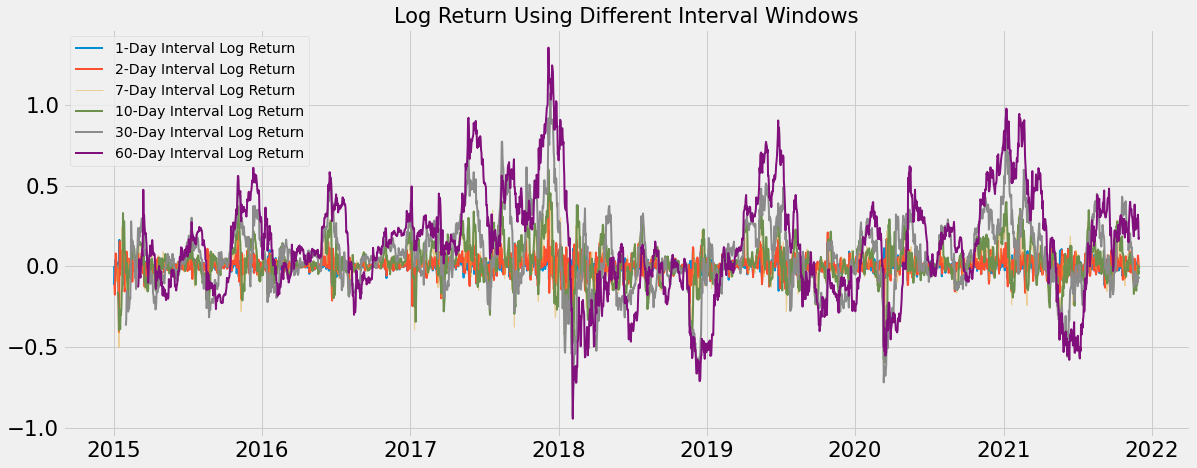

In [7]:
# 改变matplotlib风格
plt.style.use(['fivethirtyeight'])

fig, ax = plt.subplots(figsize=(18,7))

for i in intervals:
    if i == 7:
        alpha = 0.5
        lw = 1
    else:
        alpha = 1.0
        lw = 2
    ax.plot(logs_df[i], label=f'{i}-Day Interval Log Return', 
            alpha=alpha, lw=lw)

ax.set_title('Log Return Using Different Interval Windows', fontsize=21)

plt.legend(loc='best', prop={'size': 14})
plt.show();

In [8]:
INTERVAL_WINDOW = 30
n_future = 7

# 当前log return
df['log_return_current'] = np.log(df.AdjClose/df.AdjClose.shift(30))
#未来log return
df['log_return_future'] = df.log_return_current.shift(-n_future)

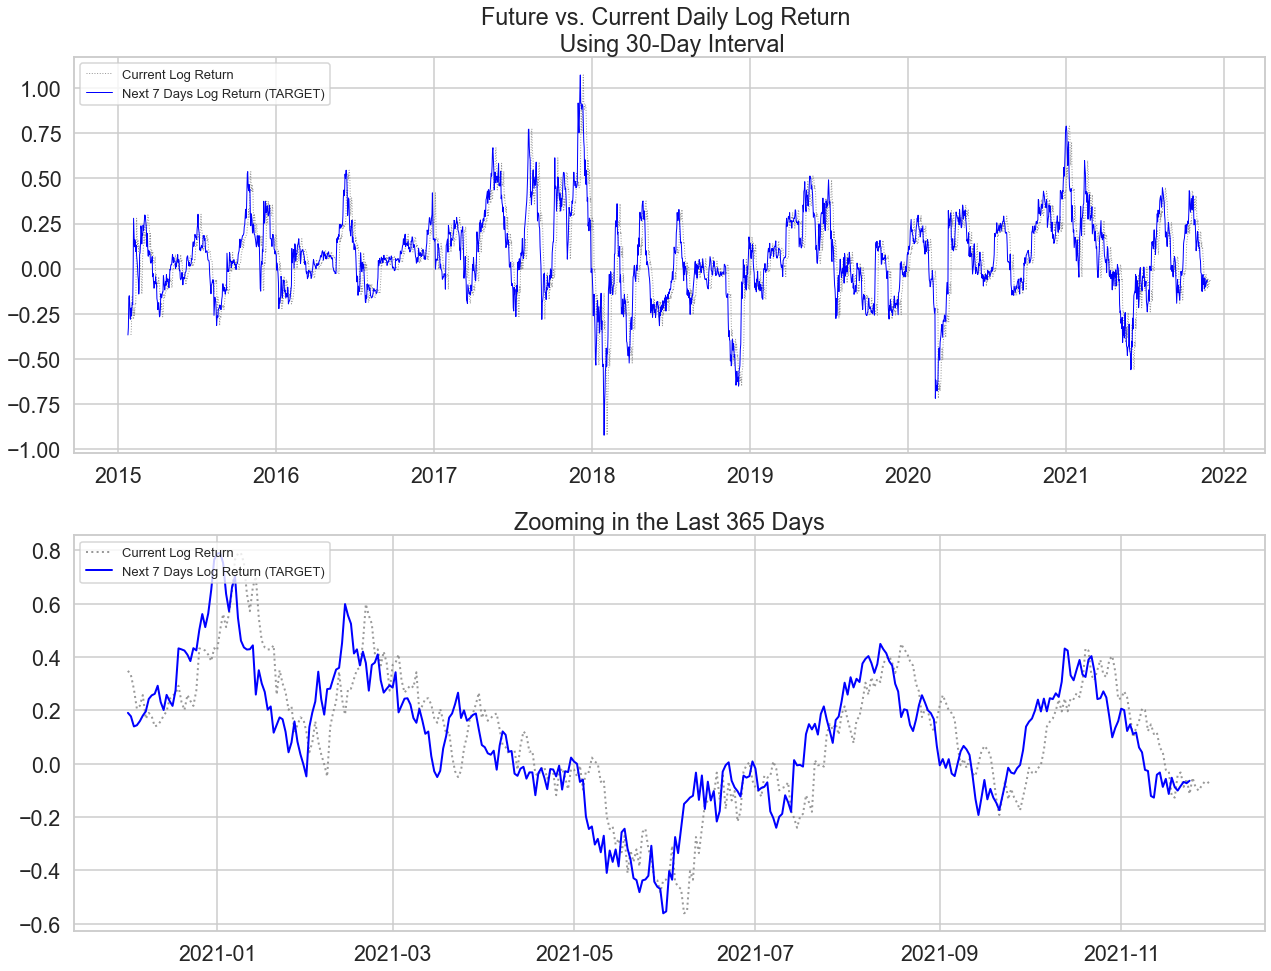

In [9]:
n_zoom = 365
sns.set_context("talk", font_scale=1.3)

# 当前未来可视化
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df.log_return_current, alpha=.8, lw=1, color='gray', ls=':',
            label='Current Log Return')
    ax1.plot(df.log_return_future, lw=1, color='blue',
            label=f'Next {n_future} Days Log Return (TARGET)')

    ax2.plot(df.log_return_current[-n_zoom:], alpha=.8, lw=2, color='gray', ls=':',
            label='Current Log Return')
    ax2.plot(df.log_return_future[-n_zoom:], lw=2, color='blue',
            label=f'Next {n_future} Days Log Return (TARGET)')

    ax1.title.set_text(f'Future vs. Current Daily Log Return \n Using {INTERVAL_WINDOW}-Day Interval')
    ax2.title.set_text(f'Zooming in the Last {n_zoom} Days')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.tight_layout()
    plt.show();

In [10]:
df.dropna(inplace=True)

In [11]:
# 划分数据集 用最近30天作为测试 再往前最近一年作为验证
test_size = 30
val_size = 365

# 转成数字方便之后切片
split_time_1 = len(df) - (val_size + test_size)
split_time_2 = len(df) - test_size

train_idx = df.index[:split_time_1]
val_idx = df.index[split_time_1:split_time_2]
test_idx = df.index[split_time_2:]

print(f'TRAINING \tFrom: {train_idx[0]} \tto: {train_idx[-1]} \t{len(train_idx)} days')
print(f'VALIDATION \tFrom: {val_idx[0]} \tto: {val_idx[-1]} \t{len(val_idx)} days')
print(f'TEST \t\tFrom: {test_idx[0]} \tto: {test_idx[-1]} \t{len(test_idx)} days')

TRAINING 	From: 2015-01-31 00:00:00 	to: 2020-10-25 00:00:00 	2095 days
VALIDATION 	From: 2020-10-26 00:00:00 	to: 2021-10-25 00:00:00 	365 days
TEST 		From: 2021-10-26 00:00:00 	to: 2021-11-24 00:00:00 	30 days


In [12]:
# 把我们要预测的lr变量分成三份
y_train = df.log_return_future[train_idx]
y_val = df.log_return_future[val_idx]
y_test = df.log_return_future[test_idx]

In [13]:
x_train = df.log_return_current[train_idx]
x_val = df.log_return_current[val_idx]
x_test = df.log_return_current[test_idx]

In [14]:
#设置归一化函数
def transform_logreturn_to_scaler(scaler, tf_series):
    '''
    Transform a series to a fitted scaler
    '''
    idx = tf_series.index
    output = pd.Series(scaler.transform(tf_series.values.reshape(-1,1))[:,0],
                       index=idx)
    return output

In [15]:
scaler_lr = MinMaxScaler()

##数据归一化
scaler_lr = scaler_lr.fit(x_train.values.reshape(-1,1))

x_train_scaled = transform_logreturn_to_scaler(scaler_lr, x_train)
y_train_scaled = transform_logreturn_to_scaler(scaler_lr, y_train)

x_val_scaled = transform_logreturn_to_scaler(scaler_lr, x_val)
y_val_scaled = transform_logreturn_to_scaler(scaler_lr, y_val)

x_test_scaled = transform_logreturn_to_scaler(scaler_lr, x_test)
y_test_scaled = transform_logreturn_to_scaler(scaler_lr, y_test)

In [16]:
x_train.head(10)

Date
2015-01-31   -0.368152
2015-02-01   -0.327848
2015-02-02   -0.165414
2015-02-03   -0.150558
2015-02-04   -0.190554
2015-02-05   -0.276244
2015-02-06   -0.280850
2015-02-07   -0.218413
2015-02-08   -0.262269
2015-02-09   -0.221902
Name: log_return_current, dtype: float64

In [17]:
y_train.head(10)

Date
2015-01-31   -0.218413
2015-02-01   -0.262269
2015-02-02   -0.221902
2015-02-03   -0.189322
2015-02-04   -0.200309
2015-02-05   -0.018306
2015-02-06    0.279039
2015-02-07    0.203960
2015-02-08    0.120836
2015-02-09    0.160039
Name: log_return_future, dtype: float64

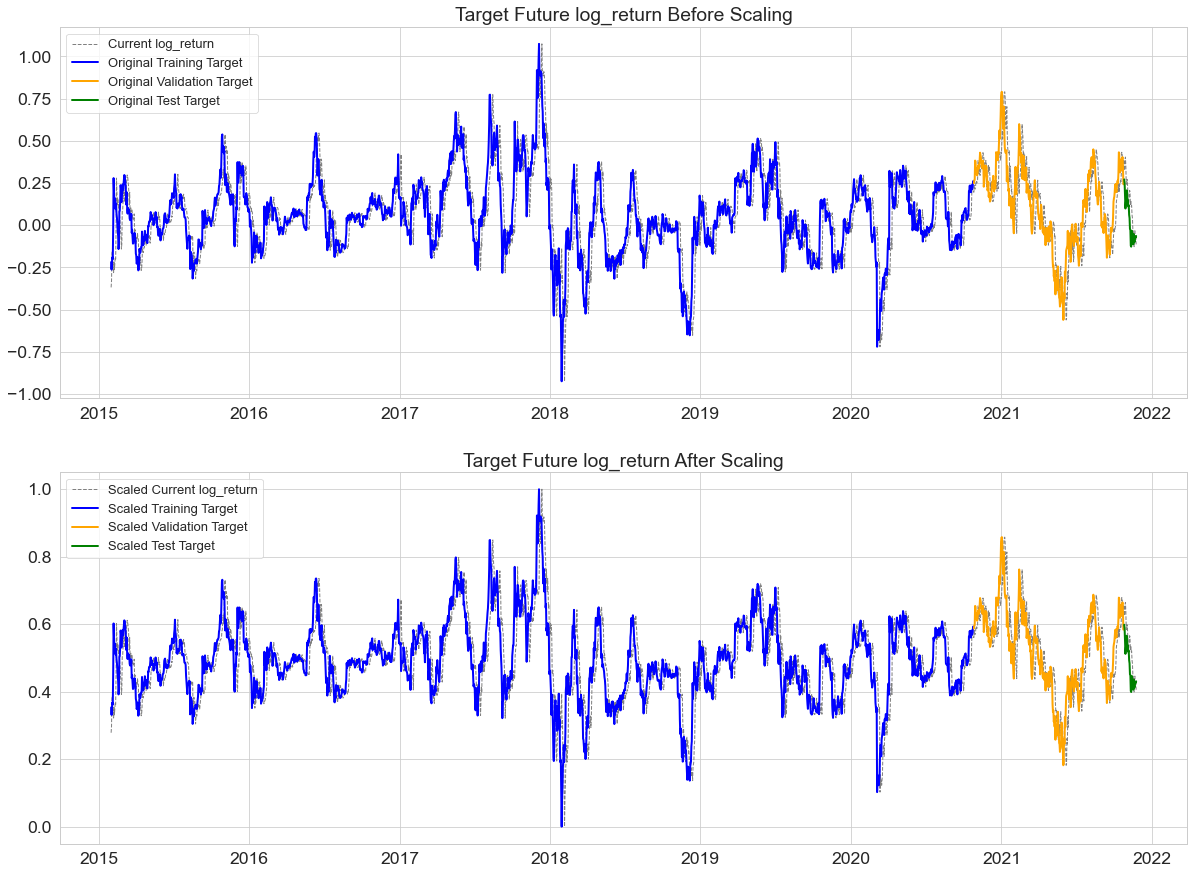

In [18]:
sns.set_context("paper", font_scale=2)

#将三个数据集可视化
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df.log_return_current, lw=1, color='gray', ls='--',
                label='Current log_return')
    ax1.plot(y_train, color='blue', label='Original Training Target', lw=2)
    ax1.plot(y_val, color='orange', label='Original Validation Target', lw=2)
    ax1.plot(y_test, color='green', label='Original Test Target', lw=2)

    ax1.title.set_text('Target Future log_return Before Scaling')

    ax2.plot(transform_logreturn_to_scaler(scaler_lr, df.log_return_current), 
                lw=1, color='gray', ls='--',
                label='Scaled Current log_return')
    ax2.plot(y_train_scaled, color='blue', label='Scaled Training Target', lw=2)
    ax2.plot(y_val_scaled, color='orange', label='Scaled Validation Target', lw=2)
    ax2.plot(y_test_scaled, color='green', label='Scaled Test Target', lw=2)

    ax2.title.set_text('Target Future log_return After Scaling')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.show();

In [19]:
# RMPSE
def RMSPE(y_true, y_pred):
    output = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return output

# RMSE
def RMSE(y_true, y_pred):
    output = np.sqrt(mse(y_true, y_pred))
    return output

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# 加入对比表格 记录每个模型的评价指标
perf_df = pd.DataFrame(columns=['Model', 'Validation RMSPE', 'Validation RMSE','Validation R2','Validation MAE'])

def log_perf(y_true, y_pred, model_name):
    perf_df.loc[len(perf_df.index)] = [model_name, 
                                       RMSPE(y_true, y_pred), 
                                       RMSE(y_true, y_pred),
                                       r2_score(y_true,y_pred),
                                       mean_absolute_error(y_pred,y_true)]
    return perf_df

#拟合效果可视化
def viz_model(y_true, y_pred, model_name):
    sns.set_context("paper", font_scale=1.7)
    plt.rcParams["axes.grid"] = False

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(18,7))
        plt.plot(x_val_scaled, color='gray',  ls=':',
                label=f"Scaled Current Daily Log-Return")
        
        plt.plot(y_true, color='blue', lw=2, 
                label=f"Target Log-Return")
        plt.plot(y_pred, color='orange', lw=2.5,
                label=f'Forecasted Log-Return')
        

        plt.title(f'{model_name} \non Validation Data')
        plt.legend(loc='best', frameon=True)

In [21]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
from decimal import Decimal

In [22]:
#设置滑动窗口
def windowed_dataset(x_series, y_series, lookback_window):
    dataX, dataY = [], []
    for i in range((lookback_window-1), len(x_series)):
        start_idx = x_series.index[i-lookback_window+1]
        end_idx = x_series.index[i]
        a = x_series[start_idx:end_idx].values
        dataX.append(a)
        dataY.append(y_series[end_idx])

    return np.array(dataX), np.array(dataY)
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays
    that can be used as metrics for NN during training
    '''
    loss = K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

    return loss

In [23]:
#预测函数
def forecast(model, range_idx):
    start_idx = range_idx[0] - timedelta(n_past - 1)
    end_idx = range_idx[-1]
    mat_X, _ = windowed_dataset(df.log_return_current[start_idx:end_idx], 
                                df.log_return_future[range_idx], n_past)
    preds = pd.Series(model.predict(mat_X)[:, 0],
                      index=range_idx)

    return preds

def scale(scaler, y_series):
    scaled = pd.Series(scaler.transform(y_series.values.reshape(-1,1))[:, 0],
                       index=y_series.index)
    return scaled

In [24]:
# 简单LSTM建模
tf.keras.backend.clear_session()

seed

n_past = 14
batch_size = 64

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

lstm_1 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                           input_shape=[None]),                            
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dense(1)
])

lstm_1.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_1.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# 当RMPSE达到平衡将停止训练
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
#训练数据
lstm_1_res = lstm_1.fit(mat_X_train, mat_y_train, 
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2, shuffle=True,
                        verbose=0, batch_size=batch_size, epochs=200)

In [26]:
# 验证集预测
lstm_1_preds = forecast(lstm_1, val_idx)
lstm_1_preds_scaled = scale(scaler_lr, lstm_1_preds)

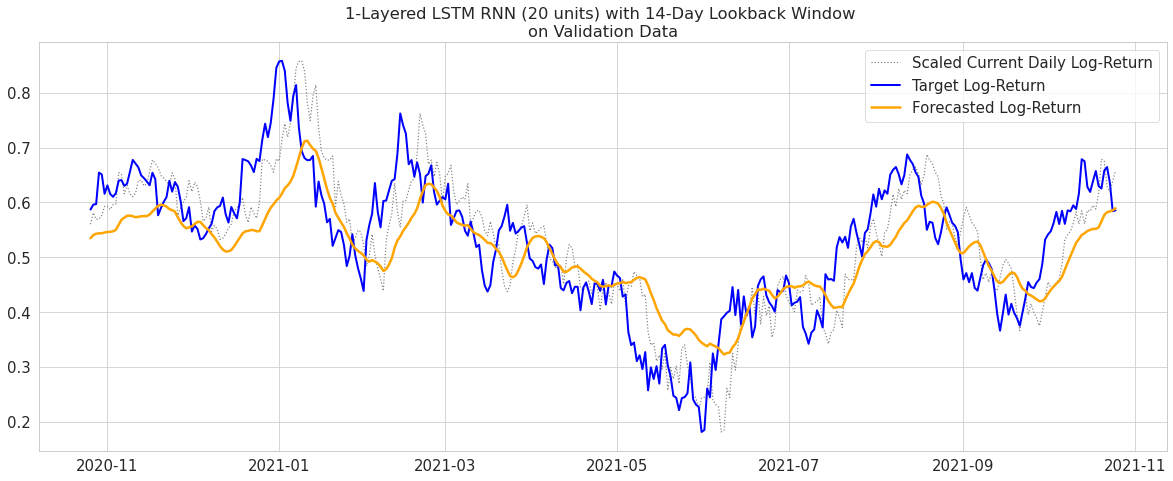

In [27]:
# 可视化
viz_model(y_val_scaled, lstm_1_preds_scaled, 
          f"1-Layered LSTM RNN (20 units) with {n_past}-Day Lookback Window")
plt.show();

In [28]:
log_perf(y_val_scaled, lstm_1_preds_scaled, 
         f"LSTM 1 layer 20 units, n_past={n_past}")

,Model,Validation RMSPE,Validation RMSE,Validation R2,Validation MAE
0,"LSTM 1 layer 20 units, n_past=14",0.184219,0.08095,0.583522,0.065329


In [29]:
# 在测试集预测
lstm_1_preds_test = forecast(lstm_1, test_idx)

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

r2_score_lstm2=r2_score(y_test,lstm_1_preds_test)
mse_lstm2=mean_squared_error(lstm_1_preds_test,y_test)
mae_lstm2=mean_absolute_error(lstm_1_preds_test,y_test)
print('R2={} mse={} mae={}'.format(r2_score_lstm2,mse_lstm2,mae_lstm2))

R2=0.3863771322839963 mse=0.009040723576141498 mae=0.07351710486403278


In [31]:
q1 = df.log_return_current[:split_time_2].describe()['25%']

q2 = df.log_return_current[:split_time_2].describe()['50%']

q3 = df.log_return_current[:split_time_2].describe()['75%']

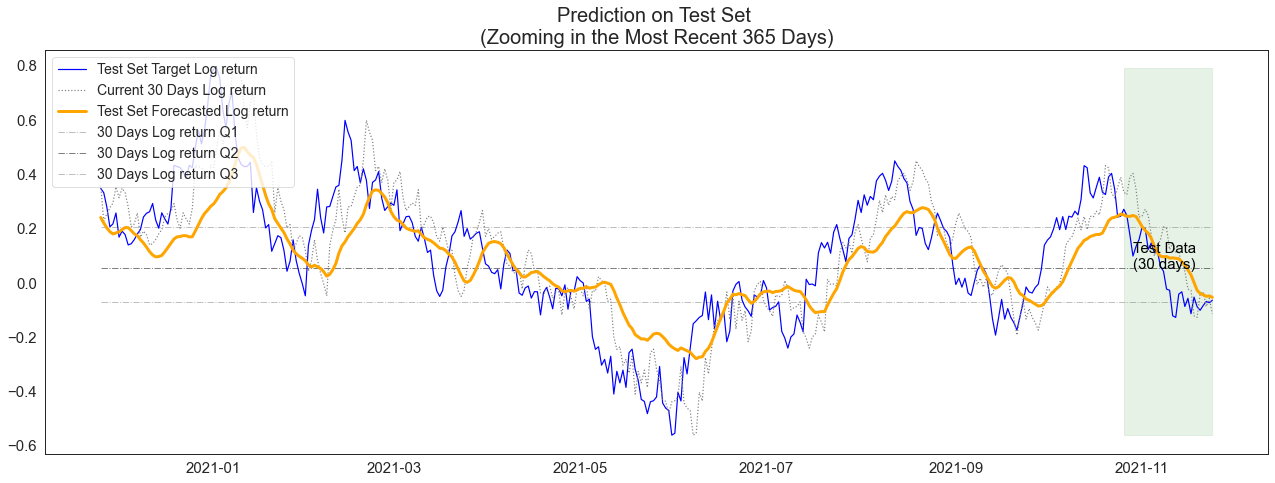

In [32]:
with sns.axes_style("white"):
    fig, ax1 = plt.subplots(figsize=(18,7))
    n_display = 365

    ax1.plot(df.log_return_future[-n_display:], color='blue', 
                label=f"Test Set Target Log return")
    ax1.plot(df.log_return_current[-n_display:], color='gray',  ls=':',
                label=f"Current 30 Days Log return")
    ax1.plot(pd.concat([lstm_1_preds[30:],lstm_1_preds_test]), color='orange', lw=3,
                label=f'Test Set Forecasted Log return')
    
    q_colors = ['gray', 'black', 'gray']
    for i, q in enumerate([q1, q2, q3]):
        ax1.hlines(y=q, color=q_colors[i], alpha=0.5, label=f'30 Days Log return Q{i+1}', ls='-.', lw=1,
                    xmin=df.log_return_future[-n_display:].index[0],
                    xmax=df.log_return_future[-n_display:].index[-1])
        
    # 给测试集加个背景   
    w = len(test_idx) - 1 
    h = df.log_return_future[-n_display:].max() - df.log_return_future[-n_display:].min()
    x0 = mdates.date2num(df.index[split_time_2])
    y0 = df.log_return_future[-n_display:].min()
    rect = Rectangle((x0, y0), w, h, color ='green', alpha=0.1)
    ax1.add_patch(rect)

    ax1.text(df.index[(split_time_2 + 3)], 0.05, 
             'Test Data\n(30 days)', 
             fontsize=15, color='black')

    plt.title(f'Prediction on Test Set \n(Zooming in the Most Recent {n_display} Days)', fontsize=20)
    ax1.legend(loc='upper left', prop={'size': 14})
    plt.tight_layout()
    plt.show();

In [33]:
# BiLSTM
tf.keras.backend.clear_session()
seed

n_past = 30
batch_size = 64

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

lstm_2 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                           input_shape=[None]),  
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(1)
])

lstm_2.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_2.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          8704      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                10368     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 19,105
Trainable params: 19,105
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
lstm_2_res = lstm_2.fit(mat_X_train, mat_y_train, 
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2, shuffle=True,
                        verbose=0, batch_size=batch_size, epochs=200)

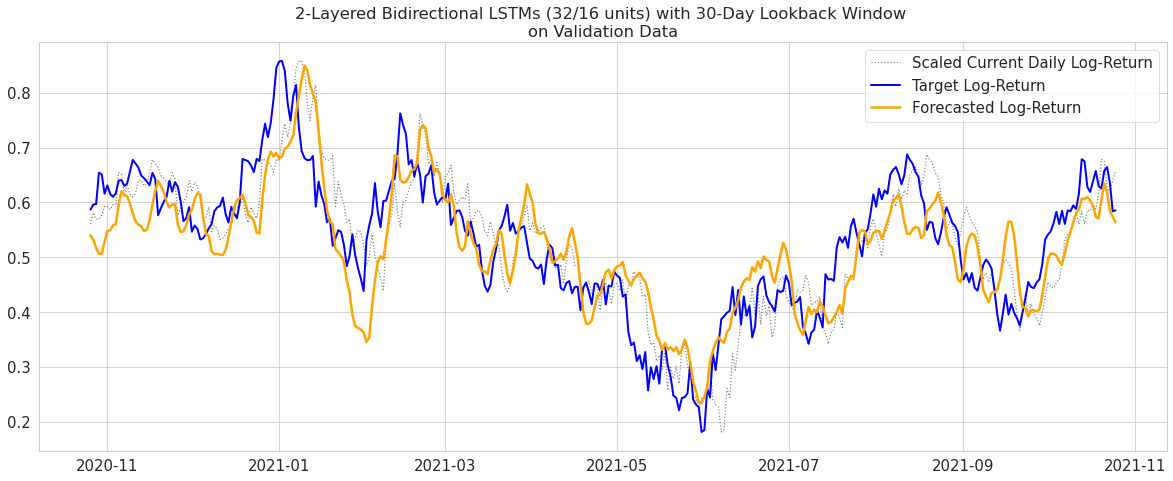

In [35]:
lstm_2_preds = forecast(lstm_2, val_idx)
lstm_2_preds_scaled = scale(scaler_lr, lstm_2_preds)
viz_model(y_val_scaled, lstm_2_preds_scaled, 
          f"2-Layered Bidirectional LSTMs (32/16 units) with {n_past}-Day Lookback Window")
plt.show();

In [36]:
lstm_2_preds_test = forecast(lstm_2, test_idx)

In [38]:
r2_score_lstm2=r2_score(y_test,lstm_2_preds_test)
mse_lstm2=mean_squared_error(lstm_2_preds_test,y_test)
mae_lstm2=mean_absolute_error(lstm_2_preds_test,y_test)
print('R2={} mse={} mae={}'.format(r2_score_lstm2,mse_lstm2,mae_lstm2))

R2=0.4985964350671376 mse=0.0073873567449052515 mae=0.07211248988617694


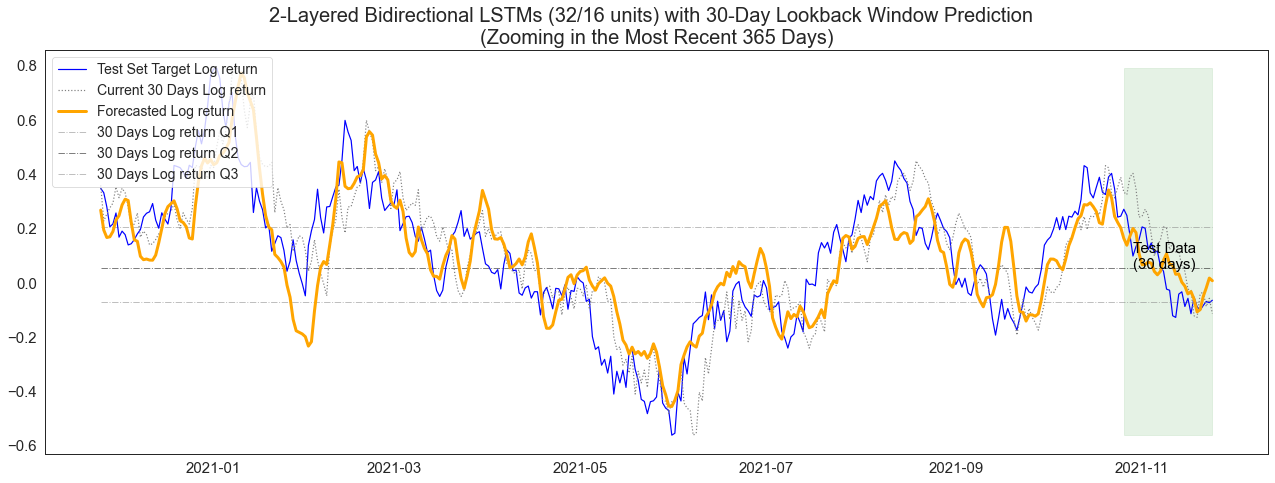

In [39]:
with sns.axes_style("white"):
    fig, ax1 = plt.subplots(figsize=(18,7))
    n_display = 365

    ax1.plot(df.log_return_future[-n_display:], color='blue', 
                label=f"Test Set Target Log return")
    ax1.plot(df.log_return_current[-n_display:], color='gray',  ls=':',
                label=f"Current 30 Days Log return")
    ax1.plot(pd.concat([lstm_2_preds[30:],lstm_2_preds_test]), color='orange', lw=3,
                label=f'Forecasted Log return')
    
    q_colors = ['gray', 'black', 'gray']
    for i, q in enumerate([q1, q2, q3]):
        ax1.hlines(y=q, color=q_colors[i], alpha=0.5, label=f'30 Days Log return Q{i+1}', ls='-.', lw=1,
                    xmin=df.log_return_future[-n_display:].index[0],
                    xmax=df.log_return_future[-n_display:].index[-1])
        
    w = len(test_idx) - 1 
    h = df.log_return_future[-n_display:].max() - df.log_return_future[-n_display:].min()
    x0 = mdates.date2num(df.index[split_time_2])
    y0 = df.log_return_future[-n_display:].min()
    rect = Rectangle((x0, y0), w, h, color ='green', alpha=0.1)
    ax1.add_patch(rect)

    ax1.text(df.index[(split_time_2 + 3)], 0.05, 
             'Test Data\n(30 days)', 
             fontsize=15, color='black')

    plt.title(f'2-Layered Bidirectional LSTMs (32/16 units) with {n_past}-Day Lookback Window Prediction  \n(Zooming in the Most Recent {n_display} Days)', fontsize=20)
    ax1.legend(loc='upper left', prop={'size': 14})
    plt.tight_layout()
    plt.show();

In [40]:
log_perf(y_val_scaled, lstm_2_preds_scaled, 
         f"2 layers Bidirect LSTM (32/16 units), n_past={n_past}")

,Model,Validation RMSPE,Validation RMSE,Validation R2,Validation MAE
0,"LSTM 1 layer 20 units, n_past=14",0.184219,0.080950,0.583522,0.065329
1,"2 layers Bidirect LSTM (32/16 units), n_past=30",0.158972,0.074339,0.648772,0.061582


In [41]:
df.head()

,Open,High,Low,AdjClose,Volume,ATR,MA5,MA10,MACD,RSI,RSV,K,D,returns,log_returns,log_return_current,log_return_future
Date,,,,,,,,,,,,,,,,,
2015-01-31,226.440994,233.503998,216.309006,217.464005,23348200.0,121.590579,234.958401,241.611500,4.747926,50.256,0.01,0.22,0.41,-3.957601,-0.040380,-0.368152,-0.218413
2015-02-01,216.867004,231.574005,212.014999,226.972000,29128500.0,119.946794,227.657800,240.968100,1.080563,50.196,0.15,0.20,0.34,4.372216,0.042793,-0.327848,-0.262269
2015-02-02,226.490997,242.175003,222.658997,238.229004,30612100.0,118.303008,228.520602,241.503100,-0.448672,52.793,0.27,0.22,0.30,4.959644,0.048406,-0.165414,-0.221902
2015-02-03,237.453995,245.957001,224.483002,227.268005,40783700.0,116.226436,227.271603,239.445201,-3.024986,49.267,0.16,0.20,0.27,-4.601035,-0.047102,-0.150558,-0.189322
2015-02-04,227.511002,230.057999,221.113007,226.852997,26594300.0,114.422435,227.357202,236.758700,-4.789319,51.136,0.23,0.21,0.25,-0.182607,-0.001828,-0.190554,-0.200309


In [42]:
features = ['Volume','ATR','MA5','MA10','MACD','RSI','K','D', 'log_return_current']

input_df = df[features]

X_train = input_df.loc[train_idx]
X_train.head()

,Volume,ATR,MA5,MA10,MACD,RSI,K,D,log_return_current
Date,,,,,,,,,
2015-01-31,23348200.0,121.590579,234.958401,241.611500,4.747926,50.256,0.22,0.41,-0.368152
2015-02-01,29128500.0,119.946794,227.657800,240.968100,1.080563,50.196,0.20,0.34,-0.327848
2015-02-02,30612100.0,118.303008,228.520602,241.503100,-0.448672,52.793,0.22,0.30,-0.165414
2015-02-03,40783700.0,116.226436,227.271603,239.445201,-3.024986,49.267,0.20,0.27,-0.150558
2015-02-04,26594300.0,114.422435,227.357202,236.758700,-4.789319,51.136,0.21,0.25,-0.190554


In [44]:
input_df = df[features]

X_train = input_df.loc[train_idx]
X_train.head()

,Volume,ATR,MA5,MA10,MACD,RSI,K,D,log_return_current
Date,,,,,,,,,
2015-01-31,23348200.0,121.590579,234.958401,241.611500,4.747926,50.256,0.22,0.41,-0.368152
2015-02-01,29128500.0,119.946794,227.657800,240.968100,1.080563,50.196,0.20,0.34,-0.327848
2015-02-02,30612100.0,118.303008,228.520602,241.503100,-0.448672,52.793,0.22,0.30,-0.165414
2015-02-03,40783700.0,116.226436,227.271603,239.445201,-3.024986,49.267,0.20,0.27,-0.150558
2015-02-04,26594300.0,114.422435,227.357202,236.758700,-4.789319,51.136,0.21,0.25,-0.190554


In [45]:
input_df.head()

,Volume,ATR,MA5,MA10,MACD,RSI,K,D,log_return_current
Date,,,,,,,,,
2015-01-31,23348200.0,121.590579,234.958401,241.611500,4.747926,50.256,0.22,0.41,-0.368152
2015-02-01,29128500.0,119.946794,227.657800,240.968100,1.080563,50.196,0.20,0.34,-0.327848
2015-02-02,30612100.0,118.303008,228.520602,241.503100,-0.448672,52.793,0.22,0.30,-0.165414
2015-02-03,40783700.0,116.226436,227.271603,239.445201,-3.024986,49.267,0.20,0.27,-0.150558
2015-02-04,26594300.0,114.422435,227.357202,236.758700,-4.789319,51.136,0.21,0.25,-0.190554


In [46]:
def forecast_multi(model, range_idx):
    start_idx = range_idx[0] - timedelta(n_past - 1)
    end_idx = range_idx[-1]
    mat_X, _ = windowed_dataset(input_df[start_idx:end_idx], 
                                df.log_return_future[range_idx], n_past)
    preds = pd.Series(model.predict(mat_X)[:, 0],
                      index=range_idx)

    return preds

In [48]:
tf.keras.backend.clear_session()
seed

n_past = 30
batch_size = 64
n_dims = input_df.shape[1]

mat_X_train, mat_y_train = windowed_dataset(X_train, y_train, n_past)

lstm_3 = tf.keras.models.Sequential([ 
    tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]),
    tf.keras.layers.BatchNormalization(), 

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(1)
])

lstm_3.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_3.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30, 9)             36        
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 64)            10752     
_________________________________________________________________
dropout (Dropout)            (None, 30, 64)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                10368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,189
Trainable params: 21,171
Non-trainable params: 18
___________________________________________________

In [49]:
lstm_3_res = lstm_3.fit(mat_X_train, mat_y_train, 
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2, shuffle=True,
                        verbose=0, batch_size=batch_size, epochs=200)

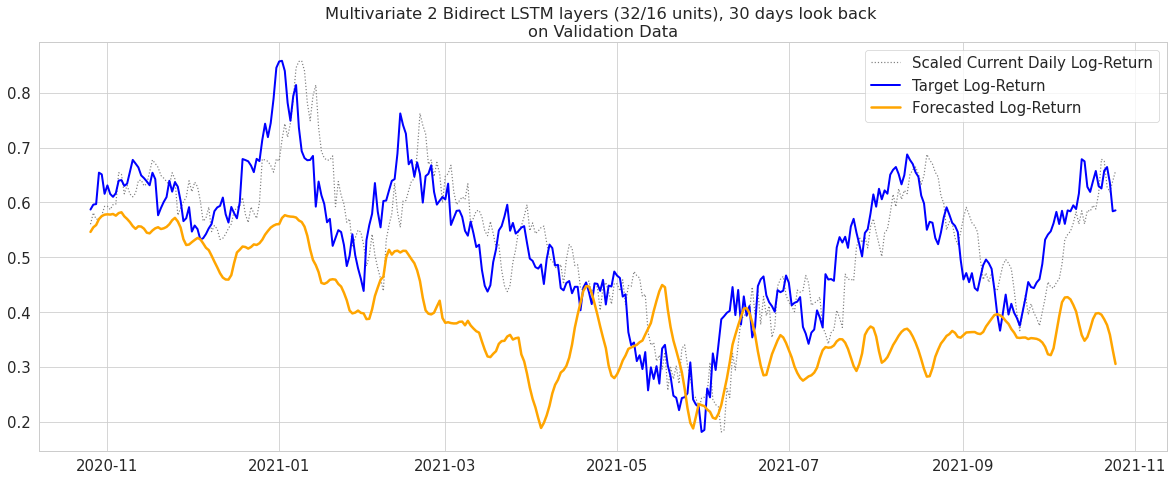

In [51]:
lstm_3_preds = forecast_multi(lstm_3, val_idx)

lstm_3_preds_scaled = scale(scaler_lr, lstm_3_preds)

viz_model(y_val_scaled, lstm_3_preds_scaled, 
          f"Multivariate 2 Bidirect LSTM layers (32/16 units), {n_past} days look back")
plt.show();

In [52]:
lstm_3_test_preds = forecast_multi(lstm_3, test_idx)

In [54]:
lstm_3_test_preds.describe()

count    30.000000
mean     -0.277941
std       0.091421
min      -0.444079
25%      -0.333713
50%      -0.280211
75%      -0.203832
max      -0.139605
dtype: float64

In [55]:
y_test.describe()

count    30.000000
mean      0.031377
std       0.123456
min      -0.127044
25%      -0.071766
50%      -0.024988
75%       0.131273
max       0.271364
Name: log_return_future, dtype: float64

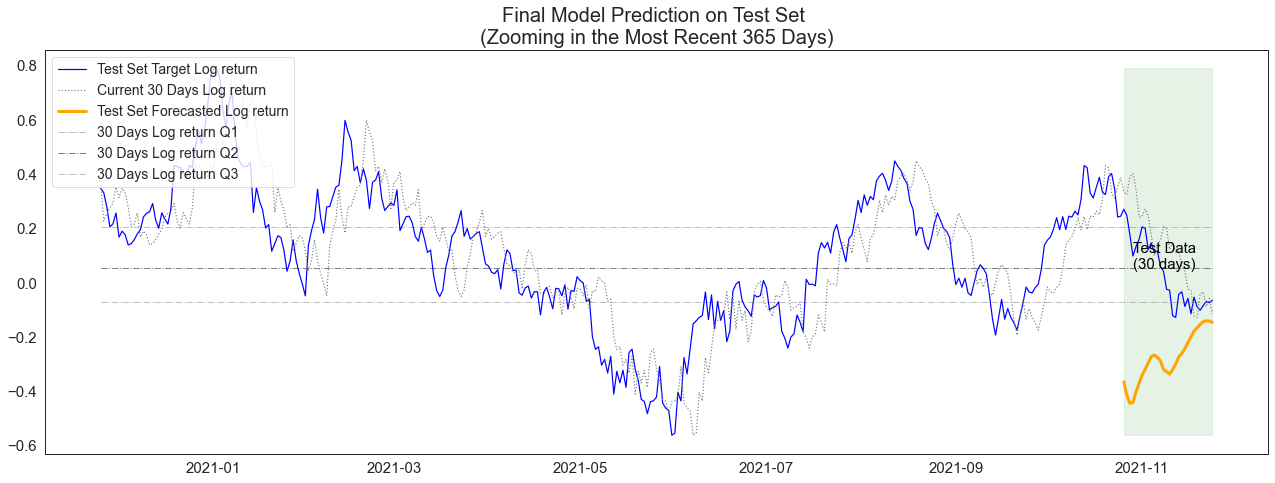

In [56]:
with sns.axes_style("white"):
    fig, ax1 = plt.subplots(figsize=(18,7))
    n_display = 365

    ax1.plot(df.log_return_future[-n_display:], color='blue', 
                label=f"Test Set Target Log return")
    ax1.plot(df.log_return_current[-n_display:], color='gray',  ls=':',
                label=f"Current 30 Days Log return")
    ax1.plot(lstm_3_test_preds, color='orange', lw=3,
                label=f'Test Set Forecasted Log return')
    
    q_colors = ['gray', 'black', 'gray']
    for i, q in enumerate([q1, q2, q3]):
        ax1.hlines(y=q, color=q_colors[i], alpha=0.5, label=f'30 Days Log return Q{i+1}', ls='-.', lw=1,
                    xmin=df.log_return_future[-n_display:].index[0],
                    xmax=df.log_return_future[-n_display:].index[-1])
         
    w = len(test_idx) - 1 
    h = df.log_return_future[-n_display:].max() - df.log_return_future[-n_display:].min()
    x0 = mdates.date2num(df.index[split_time_2])
    y0 = df.log_return_future[-n_display:].min()
    rect = Rectangle((x0, y0), w, h, color ='green', alpha=0.1)
    ax1.add_patch(rect)

    ax1.text(df.index[(split_time_2 + 3)], 0.05, 
             'Test Data\n(30 days)', 
             fontsize=15, color='black')

    plt.title(f'Final Model Prediction on Test Set \n(Zooming in the Most Recent {n_display} Days)', fontsize=20)
    ax1.legend(loc='upper left', prop={'size': 14})
    plt.tight_layout()
    plt.show();

In [58]:
log_perf(y_val_scaled, lstm_3_preds_scaled,
         f"Multivariate Bidirect LSTM 2 layers (32/16 units), n_past={n_past}")

,Model,Validation RMSPE,Validation RMSE,Validation R2,Validation MAE
0,"LSTM 1 layer 20 units, n_past=14",0.184219,0.080950,0.583522,0.065329
1,"2 layers Bidirect LSTM (32/16 units), n_past=30",0.158972,0.074339,0.648772,0.061582
2,"Multivariate Bidirect LSTM 2 layers (32/16 units), n_past=30",0.294596,0.163817,-0.705576,0.141062


In [59]:
tf.keras.backend.clear_session()
seed

n_past = 30
batch_size = 64
n_dims = input_df.shape[1]

mat_X_train, mat_y_train = windowed_dataset(X_train, y_train, n_past)

lstm_4 = tf.keras.models.Sequential([  
    tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(1)
])

lstm_4.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_4.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_4.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30, 9)             36        
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 128)           37888     
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30, 64)            41216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                10368     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [60]:
lstm_4_res = lstm_4.fit(mat_X_train, mat_y_train, epochs=200,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2,
                        verbose=0, batch_size=batch_size, shuffle=True)

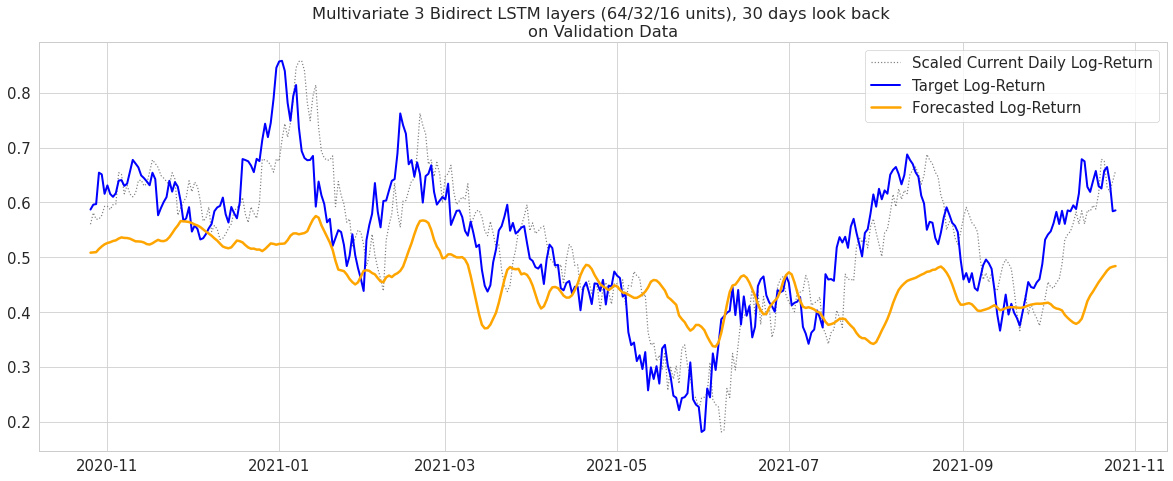

In [61]:
lstm_4_preds = forecast_multi(lstm_4, val_idx)
lstm_4_preds_scaled = scale(scaler_lr, lstm_4_preds)

viz_model(y_val_scaled, lstm_4_preds_scaled, 
          f"Multivariate 3 Bidirect LSTM layers (64/32/16 units), {n_past} days look back")
plt.show();

In [62]:
log_perf(y_val_scaled, lstm_4_preds_scaled,
         f"Multivariate Bidirect LSTM 3 layers (64/32/16 units), n_past={n_past}")

,Model,Validation RMSPE,Validation RMSE,Validation R2,Validation MAE
0,"LSTM 1 layer 20 units, n_past=14",0.184219,0.080950,0.583522,0.065329
1,"2 layers Bidirect LSTM (32/16 units), n_past=30",0.158972,0.074339,0.648772,0.061582
2,"Multivariate Bidirect LSTM 2 layers (32/16 units), n_past=30",0.294596,0.163817,-0.705576,0.141062
3,"Multivariate Bidirect LSTM 3 layers (64/32/16 units), n_past=30",0.245756,0.123801,0.025906,0.100092


In [63]:
tf.keras.backend.clear_session()
seed

n_past = 30
batch_size = 64
n_dims = input_df.shape[1]

mat_X_train, mat_y_train = windowed_dataset(X_train, y_train, n_past)

lstm_5 = tf.keras.models.Sequential([  
    tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]),
    tf.keras.layers.BatchNormalization(), 

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(1)
])

lstm_5.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_5.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_5.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30, 9)             36        
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 256)           141312    
_________________________________________________________________
dropout (Dropout)            (None, 30, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30, 128)           164352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 30, 64)            41216     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 64)            0

In [64]:
lstm_5_res = lstm_5.fit(mat_X_train, mat_y_train, epochs=200,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2,
                        verbose=0, batch_size=batch_size, shuffle=True)

In [65]:
lstm_5_preds = forecast_multi(lstm_5, val_idx)
lstm_5_preds_scaled = scale(scaler_lr, lstm_5_preds)

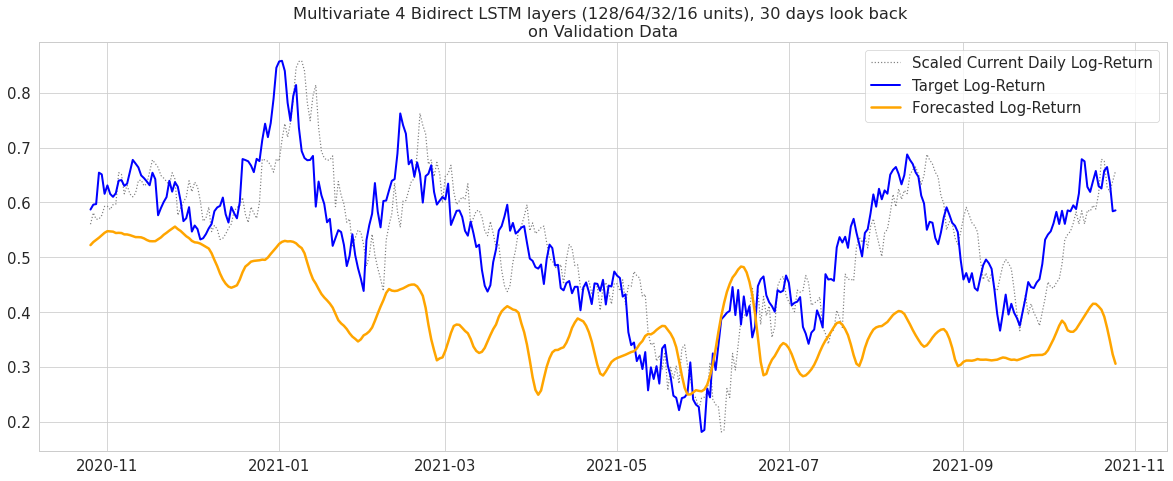

In [66]:
viz_model(y_val_scaled, lstm_5_preds_scaled, 
          f"Multivariate 4 Bidirect LSTM layers (128/64/32/16 units), {n_past} days look back")
plt.show();

In [67]:
log_perf(y_val_scaled, lstm_5_preds_scaled, 
         f"Multivariate 4 Bidirect LSTM layers (128/64/32/16 units), n_past={n_past}, batch={batch_size}")

,Model,Validation RMSPE,Validation RMSE,Validation R2,Validation MAE
0,"LSTM 1 layer 20 units, n_past=14",0.184219,0.080950,0.583522,0.065329
1,"2 layers Bidirect LSTM (32/16 units), n_past=30",0.158972,0.074339,0.648772,0.061582
2,"Multivariate Bidirect LSTM 2 layers (32/16 units), n_past=30",0.294596,0.163817,-0.705576,0.141062
3,"Multivariate Bidirect LSTM 3 layers (64/32/16 units), n_past=30",0.245756,0.123801,0.025906,0.100092
4,"Multivariate 4 Bidirect LSTM layers (128/64/32/16 units), n_past=30, batch=64",0.295967,0.168451,-0.803444,0.149192


In [68]:
import talos

def lstm_network(X_tr, y_tr, X_v, y_v, params):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]))

    # HIDDEN LAYERS
    for layer in range(params['lstm_layers'],1,-1):
        seq = False if layer == 1 else True
        
        model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2**(layer+3),
                                                                     return_sequences=seq,
                                                                     activation=params['activation'])))
        model.add(tf.keras.layers.Dropout(params['dropout']))

    model.add(tf.keras.layers.Dense(1))

    model.compile(loss='mse', 
                  optimizer='adam', 
                  metrics=[rmspe])
    
    early_stopping_cb = EarlyStopping(patience=3,
                                      restore_best_weights=True,
                                      monitor='val_rmspe')
    res = model.fit(X_tr, y_tr, 
                    validation_data=(X_v, y_v),
                    batch_size=params['batch_size'],
                    epochs=10,
                    verbose=0,
                    callbacks=[early_stopping_cb])
    
    return res, model

In [69]:
params = {'dropout': [0.1, 0.2], 
          'activation': ['relu', 'tanh', 'sigmoid'], 
          'lstm_layers': [2,3,4],
          'batch_size': [32,64]}

In [70]:
tf.keras.backend.clear_session()
seed

n_past = 30
n_dims = input_df.shape[1]

mat_X_train, mat_y_train = windowed_dataset(X_train, y_train, n_past)

from_i = val_idx[0] - timedelta(n_past - 1)
to_i = val_idx[-1]
mat_X_val, mat_y_val = windowed_dataset(input_df[from_i:to_i], 
                                        df.log_return_future[val_idx], n_past)

results = talos.Scan(x=mat_X_train, y=mat_y_train, 
                     x_val=mat_X_val, y_val=mat_y_val,
                     params=params, 
                     model=lstm_network,
                     experiment_name='grid',
                     reduction_metric='rmspe',
                     minimize_loss=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [20:18<00:00, 33.85s/it]


In [71]:
results.data.sort_values(by='val_rmspe', ascending=True)[:3]

,start,end,duration,round_epochs,loss,rmspe,val_loss,val_rmspe,activation,batch_size,dropout,lstm_layers
26,12/14/21-121025,12/14/21-121123,57.367011,5,0.053688,8.305752,0.073624,3.310708,sigmoid,32,0.1,4
27,12/14/21-121123,12/14/21-121140,16.617577,10,0.070154,17.253666,0.071625,4.573147,sigmoid,32,0.2,2
13,12/14/21-120038,12/14/21-120102,24.125426,4,0.053504,7.091725,0.069477,5.038664,tanh,32,0.1,3


In [72]:
tf.keras.backend.clear_session()
seed

n_past = 30
batch_size = 32
n_dims = input_df.shape[1]

mat_X_train, mat_y_train = windowed_dataset(X_train, y_train, n_past)

lstm_6 = tf.keras.models.Sequential([  
    tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]),
    tf.keras.layers.BatchNormalization(), 

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True, activation='sigmoid')),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True, activation='sigmoid')),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences=True, activation='sigmoid')),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(1)
])

lstm_6.compile(loss='mse', 
               optimizer="adam", 
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_6.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_6.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30, 9)             36        
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 64)            10752     
_________________________________________________________________
dropout (Dropout)            (None, 30, 64)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30, 32)            10368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 32)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 30, 16)            2624      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 16)            0

In [74]:
lstm_6_res = lstm_6.fit(mat_X_train, mat_y_train, epochs=200,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2,
                        verbose=0, batch_size=batch_size, shuffle=True)

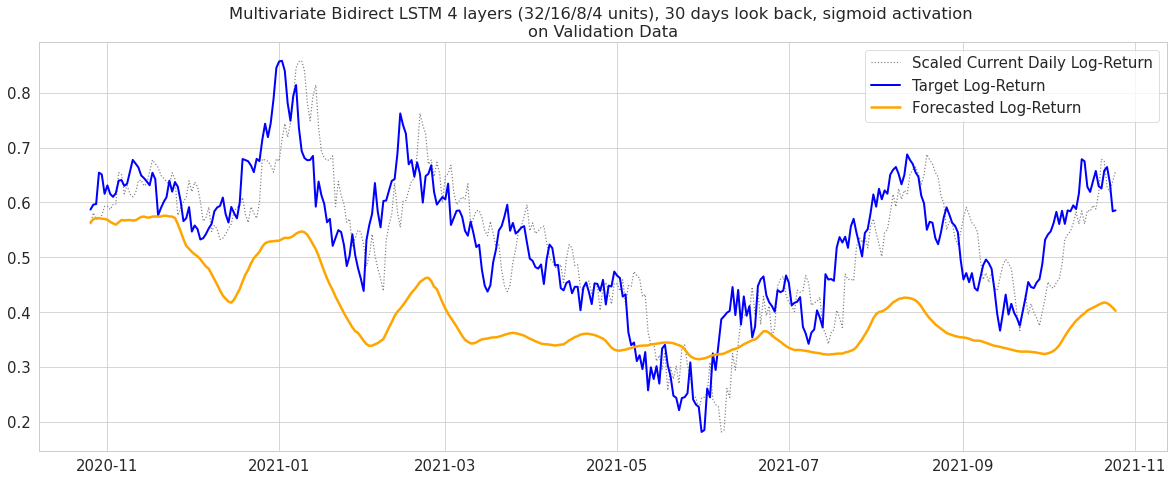

In [77]:
lstm_6_preds = forecast_multi(lstm_6, val_idx)
lstm_6_preds_scaled = scale(scaler_lr, lstm_6_preds)

viz_model(y_val_scaled, lstm_6_preds_scaled, 
          f"Multivariate Bidirect LSTM 4 layers (32/16/8/4 units), {n_past} days look back, sigmoid activation")
plt.show();

In [78]:
log_perf(y_val_scaled, lstm_6_preds_scaled, 
         f"Multivariate Bidirect LSTM 4 layers (32/16/8/4 units), n_past={n_past}, batch={batch_size}, sigmoid")

,Model,Validation RMSPE,Validation RMSE,Validation R2,Validation MAE
0,"LSTM 1 layer 20 units, n_past=14",0.184219,0.080950,0.583522,0.065329
1,"2 layers Bidirect LSTM (32/16 units), n_past=30",0.158972,0.074339,0.648772,0.061582
2,"Multivariate Bidirect LSTM 2 layers (32/16 units), n_past=30",0.294596,0.163817,-0.705576,0.141062
3,"Multivariate Bidirect LSTM 3 layers (64/32/16 units), n_past=30",0.245756,0.123801,0.025906,0.100092
4,"Multivariate 4 Bidirect LSTM layers (128/64/32/16 units), n_past=30, batch=64",0.295967,0.168451,-0.803444,0.149192
5,"Multivariate Bidirect LSTM 4 layers (32/16/8/4 units), n_past=30, batch=32, sigmoid",0.280561,0.157393,-0.574433,0.138633
